<a href="https://colab.research.google.com/github/thanmai510/sentiment_distribution/blob/main/sentiment_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving IMDB_200_reviews_sample.csv to IMDB_200_reviews_sample.csv


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Data Preview:
                                              review sentiment
0  This movie was fantastic! The plot was engagin...  positive
1  I didn't enjoy this movie. The storyline was p...  negative
2  The actors did a great job, and I loved the ci...  positive
3  The film was a waste of time. I wouldn’t recom...  negative
4  An amazing film with a moving story and incred...  positive

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     200 non-null    object
 1   sentiment  200 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB
None


<ipython-input-2-5ee83c5a94d2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment', palette="coolwarm")


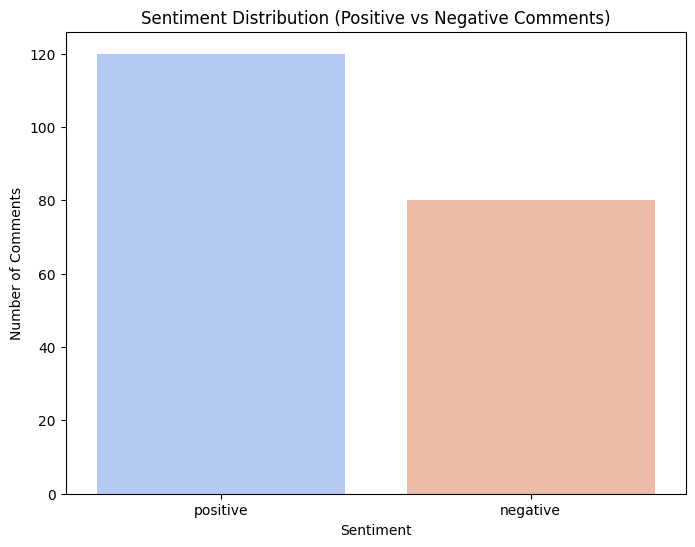

In [2]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('vader_lexicon')
data = pd.read_csv('IMDB_200_reviews_sample.csv')
print("Data Preview:")
print(data.head())
print("\nData Summary:")
print(data.info())
data.dropna(subset=['review'], inplace=True)
sid = SentimentIntensityAnalyzer()
data['sentiment_score'] = data['review'].apply(lambda review: sid.polarity_scores(review)['compound'])
data['sentiment'] = data['sentiment_score'].apply(lambda score: 'positive' if score >= 0 else 'negative')
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='sentiment', palette="coolwarm")
plt.title("Sentiment Distribution (Positive vs Negative Comments)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.show()